In [5]:
import sklearn
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt, matplotlib as mpl

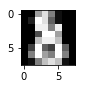

In [3]:
from sklearn import datasets

digits = datasets.load_digits()

import sklearn.svm

svc = sklearn.svm.SVC(gamma=0.001, C=100.)

svc.fit(digits.data[:-1], digits.target[:-1])

svc.predict(digits.data[-1:])

digits.target[-1:]

final = digits.data[-1]
final = final.reshape((8, 8))
plt.figure(figsize=(1, 1))
plt.imshow(final, 'gray')

In [53]:
x = np.arange(1, 5, 0.01)

In [54]:
y = np.random.normal(size=[len(x)]) + np.exp(x)

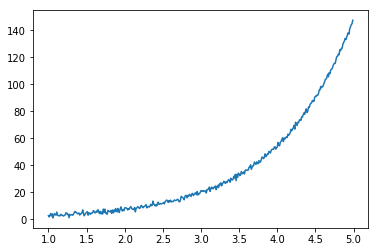

In [55]:
plt.plot(x, y)

In [56]:
lin_reg = sklearn.linear_model.LinearRegression()

In [58]:
lin_reg.fit(x[:,np.newaxis], y[:, np.newaxis])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
pred_y = lin_reg.predict(x[:, np.newaxis])

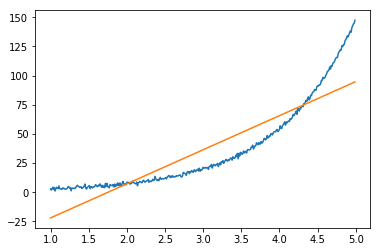

In [61]:
plt.plot(x, y, x, pred_y)

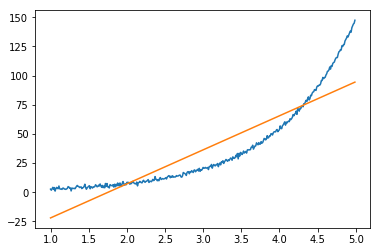

In [67]:
rig_reg = sklearn.linear_model.Ridge(alpha=1.0)
rig_reg.fit(x[:, np.newaxis], y[:, np.newaxis])
pred_y = rig_reg.predict(x[:, np.newaxis])
plt.plot(x, y, x, pred_y)

In [75]:
iris = sklearn.datasets.load_iris()

In [85]:
setosa = iris.data[iris.target == 0]
versicolor = iris.data[iris.target == 1]
virginica = iris.data[iris.target == 2]

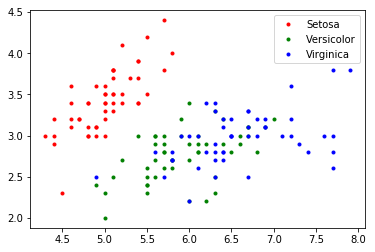

In [89]:
plt.plot(setosa[:, 0], setosa[:, 1], 'r.',
        versicolor[:, 0], versicolor[:, 1], 'g.',
        virginica[:, 0], virginica[:, 1], 'b.')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])

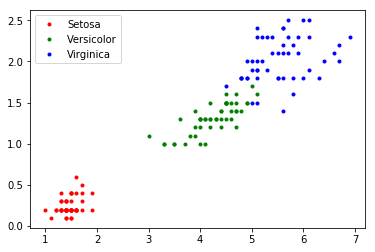

In [90]:
plt.plot(setosa[:, 2], setosa[:, 3], 'r.',
        versicolor[:, 2], versicolor[:, 3], 'g.',
        virginica[:, 2], virginica[:, 3], 'b.')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])

In [153]:
logi_reg = sklearn.linear_model.LogisticRegression(max_iter=1000)
logi_reg.fit(iris.data[:, :2], iris.target)

/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [146]:
xx = np.linspace(3, 9, 1000)
yy = np.linspace(1, 5, 1000).T
xx, yy = np.meshgrid(xx, yy)
full_plane = np.c_[xx.ravel(), yy.ravel()]

In [147]:
log_probas = logi_reg.predict_proba(full_plane)

In [149]:
color_probas = log_probas.reshape((1000, 1000, 3))

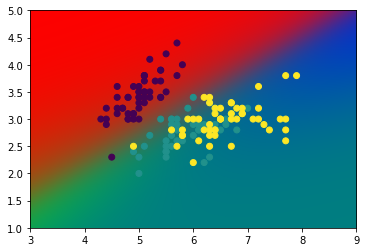

In [150]:
plt.imshow(color_probas, extent=(3, 9, 1, 5), origin='lower')
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, 
            cmap='viridis')

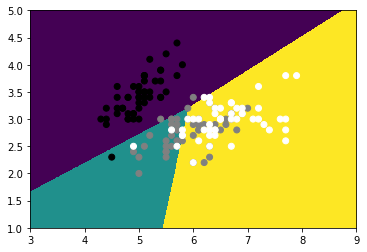

In [151]:
decision_probas = np.argmax(color_probas, -1)
plt.imshow(decision_probas, extent=(3, 9, 1, 5), origin='lower')
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, 
            cmap='gray')